### Problem Statement

Your task is to build a model to forecast the vector Y using the variables in X and Z.   
You can assume that the conditional expectation of Y given X is linear in X. 

1.	Examine and present the main characteristics of the data.
2.	Propose a forecasting model for Y only using the variables in X without Z and explain its properties.
3.	Further improve the modeling from (2) with both X and Z.
4.	Evaluate the quality of your models and of their parameter estimates. Which one produces the best forecast? Interpret why.

## Assumptions:
  1. I'm assuming that the index is significant and going to key off of it that is to say index _n_ in df X corresponds to index _n_ in df Y
  2. From analizing the data, I don't think it's time series as it doesn't look browninan 

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read in datasets 
data_pth = 'interview_problem_sets/Aquatic/data/'
X = pd.read_csv(data_pth + 'X.csv',index_col=0)
Y = pd.read_csv(data_pth + 'Y.csv',index_col=0)
Z = pd.read_csv(data_pth + 'Z.csv',index_col=0)

#fix dtype of columns from str to int
X.columns = X.columns.astype(int)
Y.columns = Y.columns.astype(int)
Z.columns = Z.columns.astype(int) 



### Exploratory data analysis

In [4]:
# Check for missing values and describe the data
print('========X========')
display(X.info())
display(X.describe())
print('========Y========')
display(Y.info())
display(Y.describe())
print('========Z========')
display(Z.info())
display(Z.describe())

========X========
<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       9998 non-null   float64
 1   1       9997 non-null   float64
 2   2       9989 non-null   float64
 3   3       9999 non-null   float64
dtypes: float64(4)
memory usage: 390.6 KB


None

,0,1,2,3
count,9998.000000,9997.000000,9989.000000,9999.000000
mean,1.000220,0.093774,0.119424,0.224848
std,100.053353,4.500255,10.020649,59.493918
min,-8.782482,-19.873700,-2.792640,-3001.334527
25%,-1.535020,-2.987551,-0.527712,-0.854265
50%,-0.022499,0.067728,0.033690,0.016713
75%,1.545641,3.175547,0.557946,0.868895
max,10001.660383,15.579372,998.329754,5134.656375


========Y========
<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       10000 non-null  float64
dtypes: float64(1)
memory usage: 156.2 KB


None

,0
count,10000.000000
mean,0.071309
std,6.828527
min,-29.504656
25%,-4.684751
50%,0.077482
75%,4.764417
max,26.526210


========Z========
<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       10000 non-null  float64
 1   1       10000 non-null  float64
dtypes: float64(2)
memory usage: 234.4 KB


None

,0,1
count,10000.000000,10000.000000
mean,0.508268,0.508695
std,0.587712,0.325677
min,-1.509356,-0.655735
25%,0.111543,0.281681
50%,0.419631,0.496166
75%,0.777893,0.728490
max,2.521868,1.561573


## Notes
 - There seems to be some missing datapoints in X that don't correspond to Y and Z 
 - First task is cleaning the dataset to show some relationships between Y and Z 
 - since the actual number of nulls are such a small part of the dataset, we will drop rather than trying to force to a condition
   - important here too is to drop the corresponding index 

## Cleaning

In [5]:
#show nulls
display(X[X.isnull().any(axis=1)])
# Y and Z are fine 
display(Y[Y.isnull().any(axis=1)])
display(Z[Z.isnull().any(axis=1)])


,0,1,2,3
19,0.060776,NaN,998.329754,0.550110
21,NaN,-8.060368,-0.629019,-0.506365
1960,NaN,NaN,NaN,NaN
2547,-0.608777,-4.847477,NaN,-0.593418
2548,0.477474,-1.707977,NaN,-0.826438
2549,-0.913324,-1.767342,NaN,-1.345334
2550,1.442422,-4.328640,NaN,0.696803
2551,-0.164028,-8.450398,NaN,-0.434869
2552,-5.833385,6.873824,NaN,-1.272665
2553,-0.323708,1.237985,NaN,0.096568


,0


,0,1


In [6]:
X = X.dropna()

In [7]:
#check for duplicates
print('X duplicates:',X.duplicated().sum())
print('Y duplicates:',Y.duplicated().sum())
print('Z duplicates:',Z.duplicated().sum())

X duplicates: 0
Y duplicates: 0
Z duplicates: 0


## Some exploratory plotting showing the main characteristicts of the data 

In [8]:
#helper function to generate plots 
def plot_data(data, title):
    # histogram
    plt.figure(figsize=(10,5))
    data.hist(bins=50, figsize=(10,10))
    plt.suptitle(f"{title} Histogram", fontsize=16)
    plt.show()
    # boxplot
    plt.figure(figsize=(10,5))
    sns.boxplot(data=data)
    plt.suptitle(f"{title} Boxplot", fontsize=16)
    plt.show()
    # scatterplot
    plt.figure(figsize=(10,5))
    sns.scatterplot(data=data)
    plt.suptitle(f"{title} Scatterplot", fontsize=16)
    # add key for the columns 
    plt.legend(title=title)
    plt.show()
    #corr matrix
    plt.figure(figsize=(10,5))
    sns.heatmap(data.corr(), annot=True)
    plt.suptitle(f"{title} Correlation Matrix", fontsize=16)
    plt.show()
    #pair plot 
    sns.pairplot(data)
    plt.suptitle(f"{title} Pairplot", fontsize=16)
    plt.show()
    

<Figure size 1000x500 with 0 Axes>

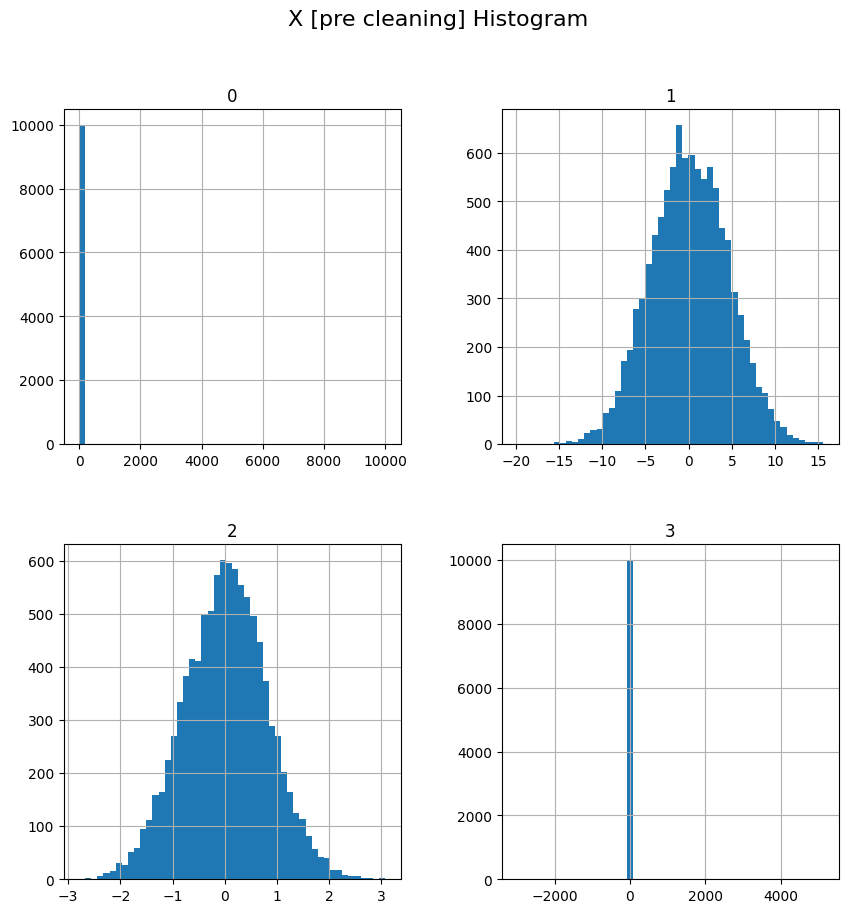

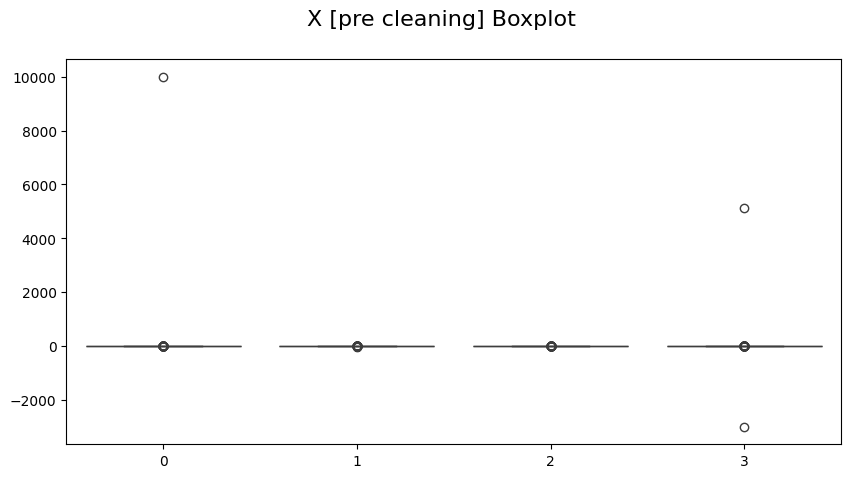

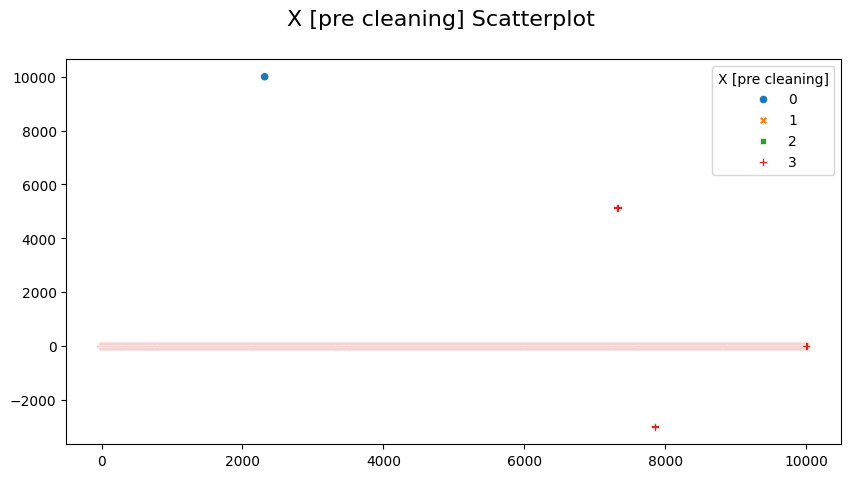

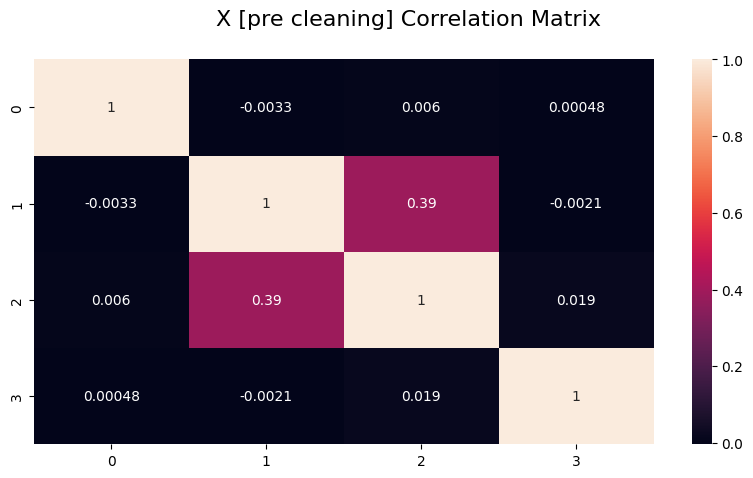

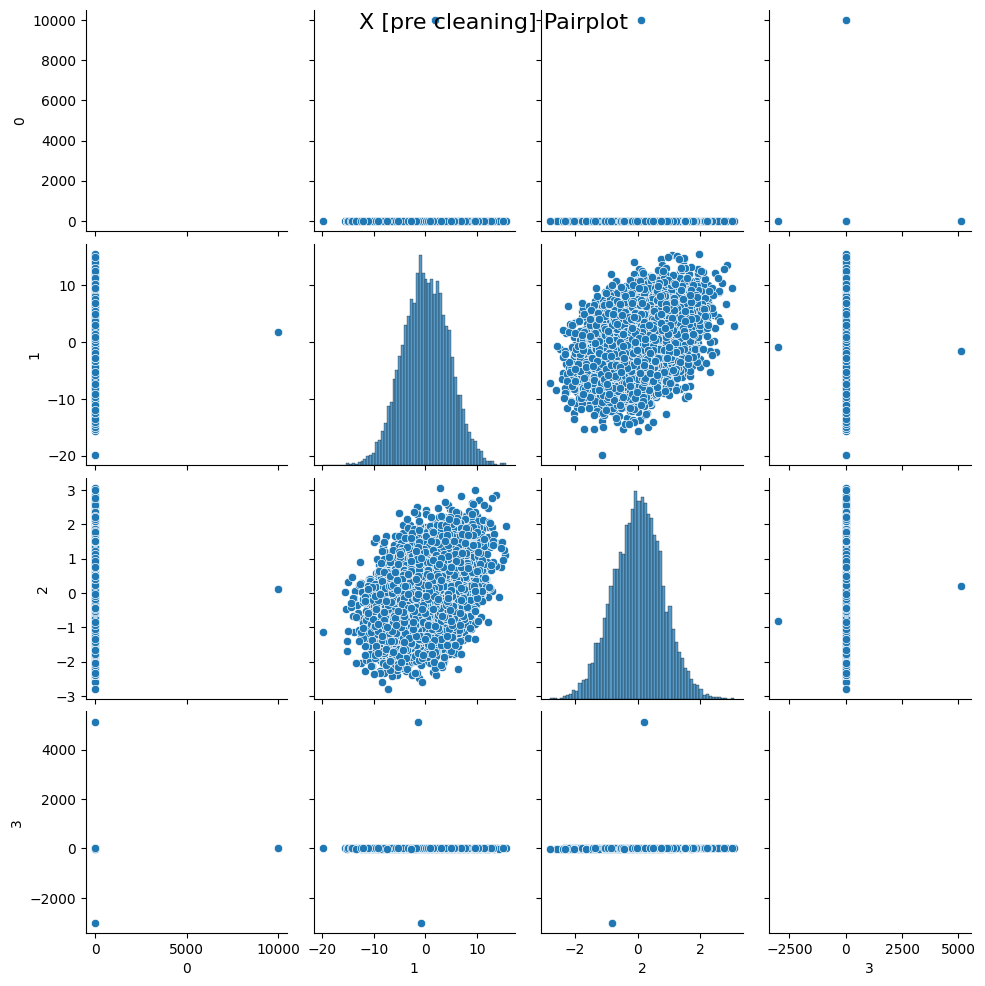

In [9]:
plot_data(X, 'X [pre cleaning]')
# there seems to be some outliers in the data that we can clean up 

<Figure size 1000x500 with 0 Axes>

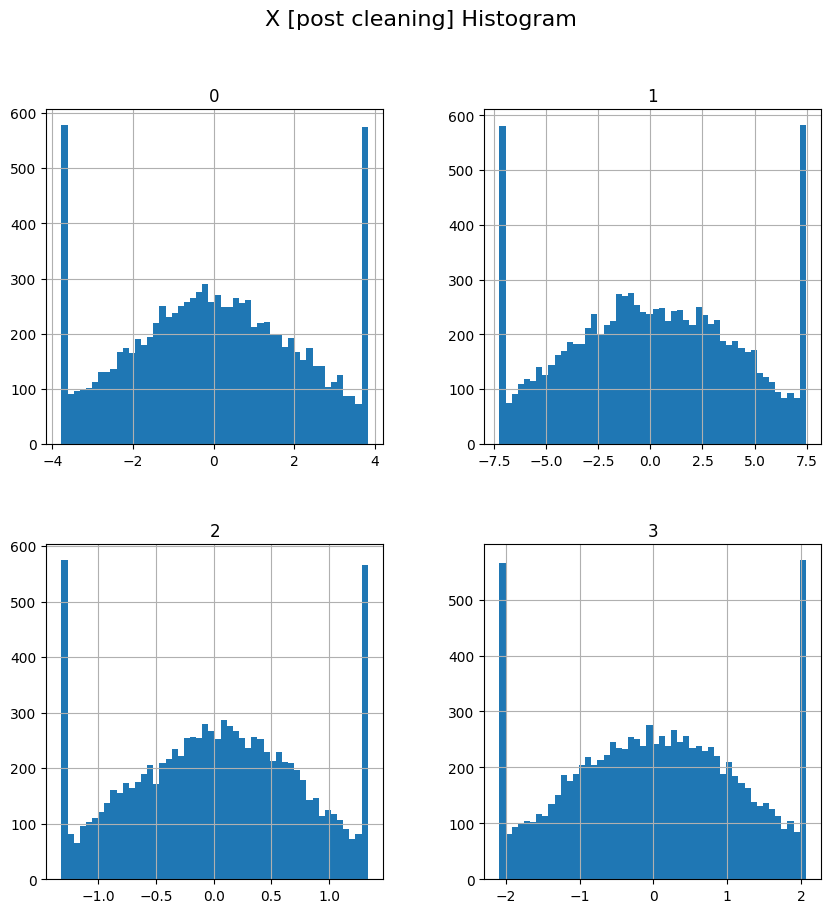

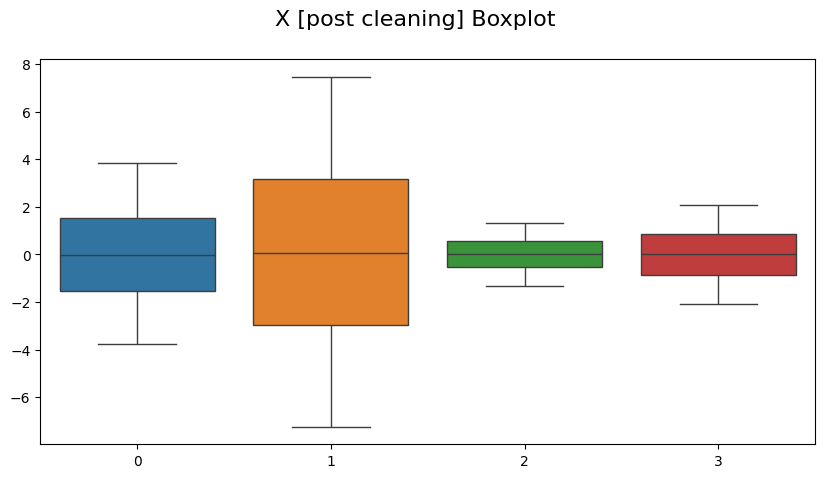

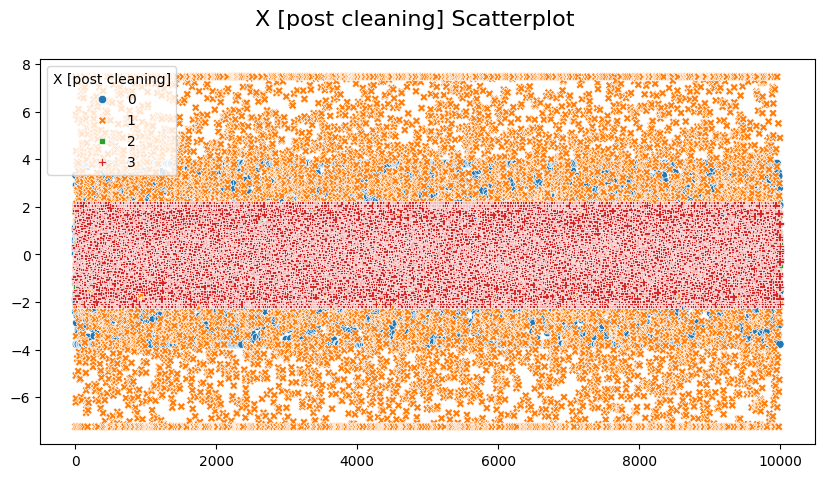

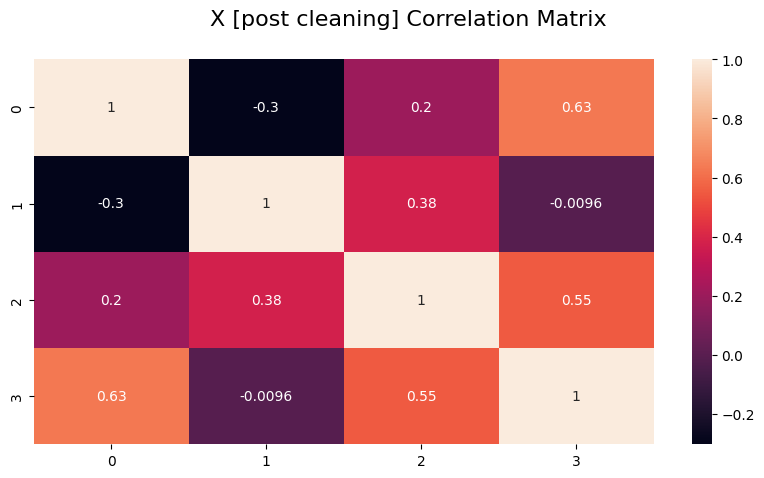

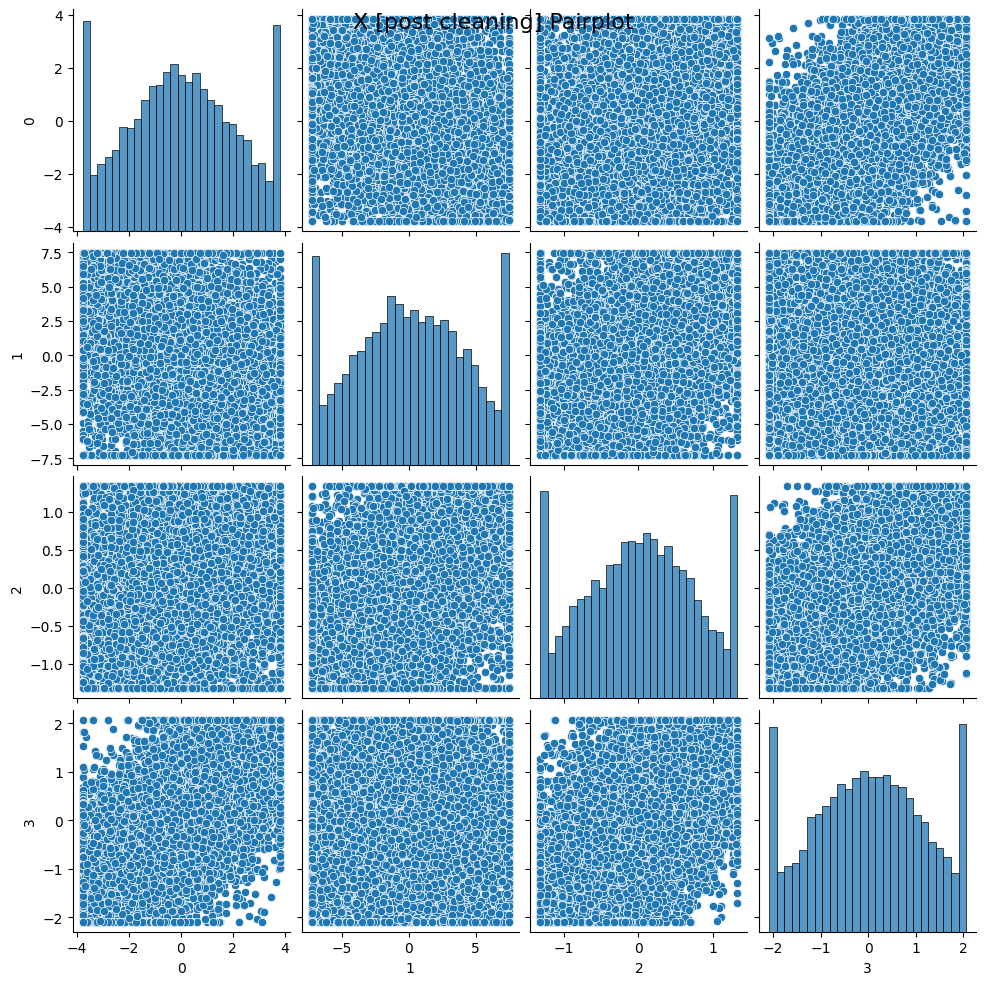

In [10]:
# removed outliers by winsoring the data
X_cleaned = X.clip(lower=X.quantile(0.05), upper=X.quantile(0.95), axis=1)
# drop the index in y and z of the windsored data
Y_cleaned = Y.loc[X_cleaned.index]
Z_cleaned = Z.loc[X_cleaned.index]
plot_data(X_cleaned, 'X [post cleaning]')

### Notes: 
- After removing outliers that seems to have improved the plotting significantly as we can see the more nuanced variance in the data set 
- of note is that in the scatterplot there seems to be some clear separation between the columns of the dataset possibly allowing for some explantion in the variance 

<Figure size 1000x500 with 0 Axes>

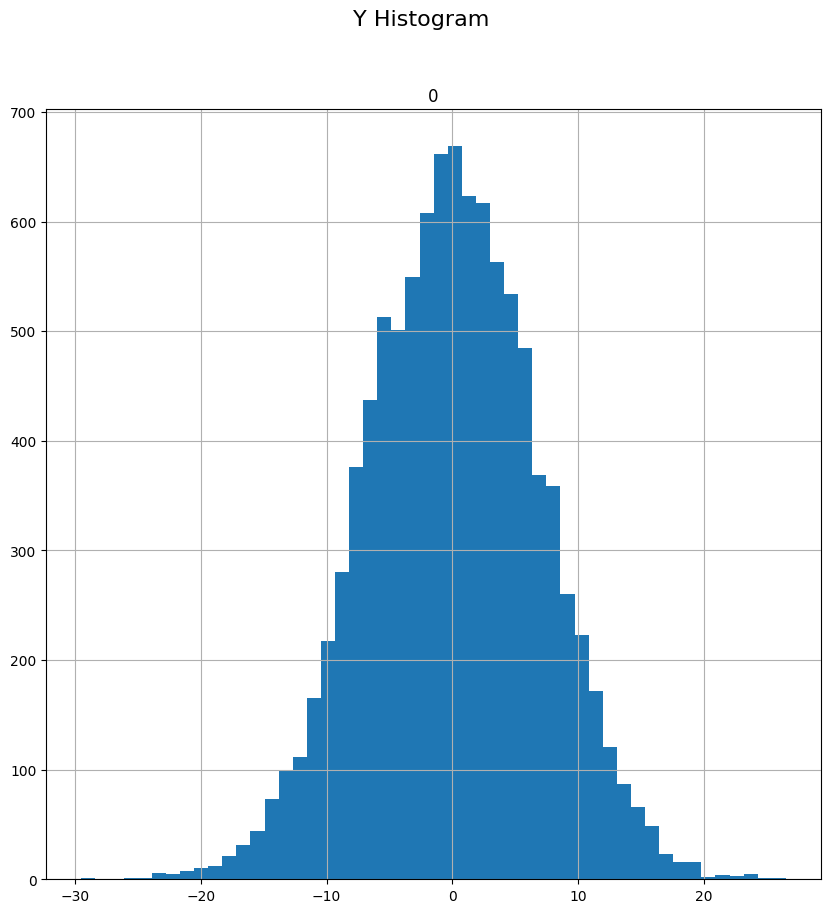

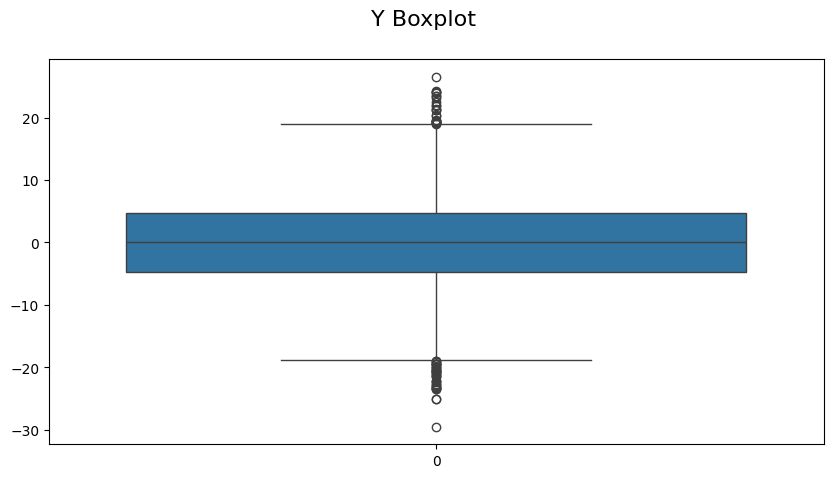

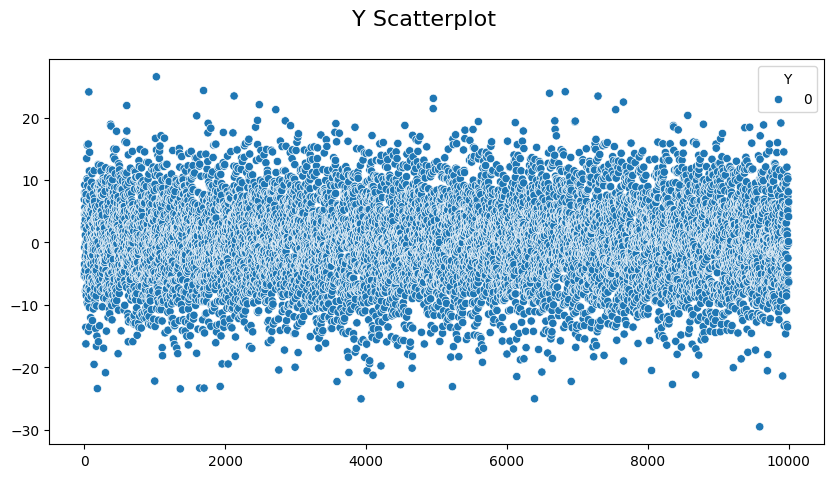

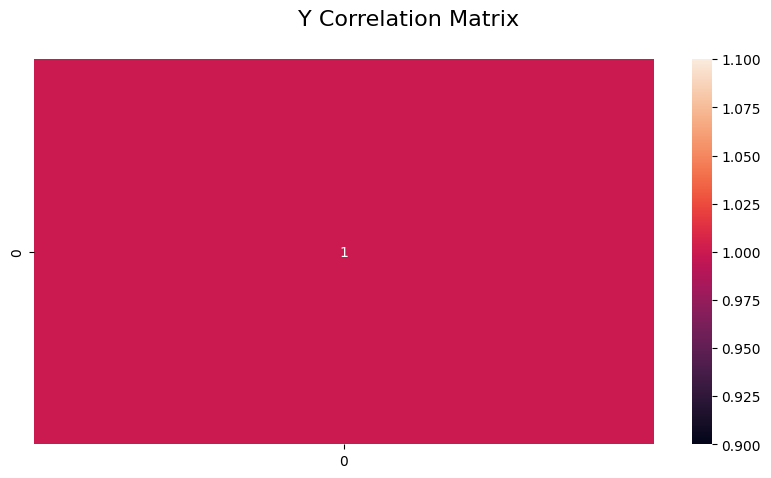

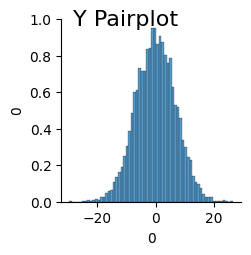

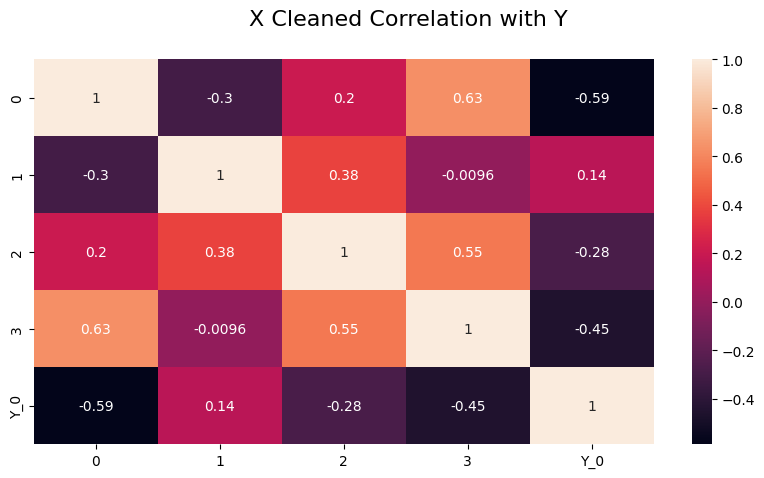

In [11]:
# take a look at Y 
plot_data(Y, 'Y')
# corr and pairplot not necessary but included for completeness
# Y seems cleaner with no outliers

#correlation matrix of X features on Y 
plt.figure(figsize=(10,5))
joined_data = X_cleaned.join(Y_cleaned.rename(columns={0:'Y_0'}))
sns.heatmap(joined_data.corr(), annot=True)
plt.suptitle("X Cleaned Correlation with Y", fontsize=16)
plt.show()

## Forecasting Model of Y based on X 

In [12]:
# linear 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cleaned)
# The data doesn't look brownian so i'm going to assume that its not time series 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y_cleaned, test_size=0.2, random_state=42)

mean_prediction = np.mean(y_train)
mse_baseline = mean_squared_error(y_test, [mean_prediction] * len(y_test))
print(f'MSE of baseline (mean predictor): {mse_baseline}')
# this needs a lot of work 

MSE of baseline (mean predictor): 46.39853752525118


## Model Selection
- as this data is purely numeric with no hints as to the context i'm doing a broad selection on models to find the best MSE before I optimize 
## Feature Selection
- I would like to focus on features 0 and 3 as they seem to have the highest correlation

In [13]:
# lets try a few different models
from sklearn.ensemble import RandomForestRegressor # random forest
from sklearn.neighbors import KNeighborsRegressor # knn (don't think this will work well but lets try it)
from sklearn.svm import SVR 
from sklearn.linear_model import Lasso # l1
from sklearn.linear_model import Ridge # l2 
from sklearn.linear_model import ElasticNet # mixture
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline


In [14]:
# create a pipeline for each model
pipelines = {
    #'rf': Pipeline([('rf', RandomForestRegressor(random_state=42))]),
    'knn': Pipeline([('knn', KNeighborsRegressor())]),
    'svr': Pipeline([('svr', SVR())]),
    'lasso': Pipeline([('lasso', Lasso())]),
    'ridge': Pipeline([('ridge', Ridge())]),
    'elastic': Pipeline([('elastic', ElasticNet())]),
    'poly': Pipeline([('poly', PolynomialFeatures()), ('lr', LinearRegression())])
}

# create a parameter grid for each model
param_grids = {
    'rf': {'rf__n_estimators': [10, 100, 1000], 'rf__max_depth': [None, 5, 10, 15, 20], 'rf__min_samples_split': [2, 5, 10]},
    'knn': {'knn__n_neighbors': [3, 5, 7, 9], 'knn__weights': ['uniform', 'distance']},
    'svr': {'svr__C': [0.1, 1, 10], 'svr__kernel': ['linear', 'poly', 'rbf']},
    'lasso': {'lasso__alpha': [0.1, 1, 10]},
    'ridge': {'ridge__alpha': [0.1, 1, 10]},
    'elastic': {'elastic__alpha': [0.1, 1, 10], 'elastic__l1_ratio': [0.1, 0.5, 0.9]},
    'poly': {'poly__degree': [2, 3, 4]}
}

In [24]:
# grid search on features and models 
feature_combinations = [
    [0,1,2,3],
    [0,1,2],
    [0,1,3],
    [0,2,3],
    [1,2,3],
    [0,1],
    [0,2],
    [0,3], # most interested in here 
    [1,2],
    [1,3],
    [2,3],
    [0],
    [1],
    [2],
    [3]
]

best_model_name = None
best_model = None
best_mse = float('inf')
best_features = None
for features in feature_combinations:
    X_train, X_test, y_train, y_test = train_test_split(X_scaled[:, features], Y_cleaned, test_size=0.2, random_state=42)
    for model_name, pipeline in pipelines.items():
        print(f"Running GridSearchCV for {model_name} with features {features}")
        grid_search = GridSearchCV(pipeline, param_grids[model_name], cv=5, n_jobs=-1, verbose=1, scoring='neg_mean_squared_error')
        grid_search.fit(X_train, y_train.values.ravel()) # fits dimensionality better
        print(f"Best parameters: {grid_search.best_params_}")
        y_pred = grid_search.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        print(f"Mean Squared Error: {mse}")
        print('=====================')
        if mse < best_mse:
            best_mse = mse
            best_model_name = model_name
            best_model = pipeline
            best_features = features

Running GridSearchCV for knn with features [0, 1, 2, 3]
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters: {'knn__n_neighbors': 9, 'knn__weights': 'uniform'}
Mean Squared Error: 31.950345686692625
Running GridSearchCV for svr with features [0, 1, 2, 3]
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters: {'svr__C': 0.1, 'svr__kernel': 'linear'}
Mean Squared Error: 28.979156665514992
Running GridSearchCV for lasso with features [0, 1, 2, 3]
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters: {'lasso__alpha': 0.1}
Mean Squared Error: 28.762958679597634
Running GridSearchCV for ridge with features [0, 1, 2, 3]
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters: {'ridge__alpha': 10}
Mean Squared Error: 28.67744589749637
Running GridSearchCV for elastic with features [0, 1, 2, 3]
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters: {'elastic__alpha': 0.1, 'elastic__l1_

In [15]:
print(f"Best model: {best_model_name}")
print(f"Best model: {best_model}")
print(f"Best features: {best_features}")
print(f"Best MSE: {best_mse}")

NameError: name 'best_model_name' is not defined

## Prelim model results
-  looks like Polynomial with LR was the best with the maximum amount of features
   -  Not super surprsing as adding a bunch of complexity with models when I do not know the underlying characteristics of the dataset is not the best route
   - lets spend some time refining this model as the MSE is still quite high, and linearly distributed 

In [150]:
# Calculate RMSE for poly model
rmse = np.sqrt(best_mse)
print(f'RMSE of model: {rmse}')

# Calculate R² and MAPE
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'R² of model: {r2}')
print(f'MAPE of model: {mape}')

# Cross-Validation
mse_cv = -cross_val_score(best_model, X_test,y_test, cv=5, scoring='neg_mean_squared_error')
print(f'Cross-Validated MSE: {mse_cv.mean()} ± {mse_cv.std()}')

RMSE of model: 5.352936085659904
R² of model: 0.3808080328123761
MAPE of model: 2.0720111091642597
Cross-Validated MSE: nan ± nan


/Users/davidhunt/Library/Caches/pypoetry/virtualenvs/learning-4nU40dZu-py3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/davidhunt/Library/Caches/pypoetry/virtualenvs/learning-4nU40dZu-py3.11/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "/Users/davidhunt/Library/Caches/pypoetry/virtualenvs/learning-4nU40dZu-py3.11/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 370, in _score
    response_method = _check_response_method(estimator, self._response_method)
                      ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/davidhunt/Library/Caches/pypoetry/virtualenvs/learning-4nU40dZu-py3.11/lib/python3.11/site-packages/sklearn/utils/validation.py", line 21

In [16]:
# retrain the polynomial model with more focused grid searching 
X_train, X_test, y_train, y_test = train_test_split(X_scaled[:, best_features], Y_cleaned, test_size=0.2, random_state=42)
poly = PolynomialFeatures(degree=2) 
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
lr = LinearRegression()
lr.fit(X_train_poly, y_train)
y_pred = lr.predict(X_test_poly)

NameError: name 'best_features' is not defined

In [17]:
# helper function to evaluate the model results
def evaluate_model(y_test,y_pred):
    mse = mean_squared_error(y_test, y_pred)
    print(f'MSE of model: {mse}')
    rmse = np.sqrt(mse)
    print(f'RMSE of model: {rmse}')
    r2 = r2_score(y_test, y_pred)
    print(f'R² of model: {r2}')
    mape = mean_absolute_percentage_error(y_test, y_pred)
    print(f'MAPE of model: {mape}')
    mse_cv = -cross_val_score(lr, X_test_poly, y_test, cv=5, scoring='neg_mean_squared_error')
    print(f'Cross-Validated MSE: {mse_cv.mean()} ± {mse_cv.std()}')
    residuals = y_test - y_pred
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, kde=True)
    plt.title('Residuals Distribution')
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, residuals)
    plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='r')
    plt.title('Residuals vs. Actual Values')
    plt.xlabel('Actual Values')
    plt.ylabel('Residuals')
    plt.show()

# helper function to iterate over feature choices
def possible_feature_combinations(features):
    import itertools

    # Generate all possible unique combinations
    all_combinations = []
    for r in range(1, len(features) + 1):
        combinations = itertools.combinations(features, r)
        #list of lists 
        combinations = [list(combination) for combination in combinations]
        all_combinations.extend(combinations)

    # Print all unique combinations
    return all_combinations

In [18]:
# plot the residuals
evaluate_model(y_test, y_pred)


NameError: name 'y_pred' is not defined

MSE of model: 28.945658390216785
RMSE of model: 5.380116949492528
R² of model: 0.3760305580666812
MAPE of model: 2.094439676699858
Cross-Validated MSE: 29.215710859271844 ± 2.7801421161130127


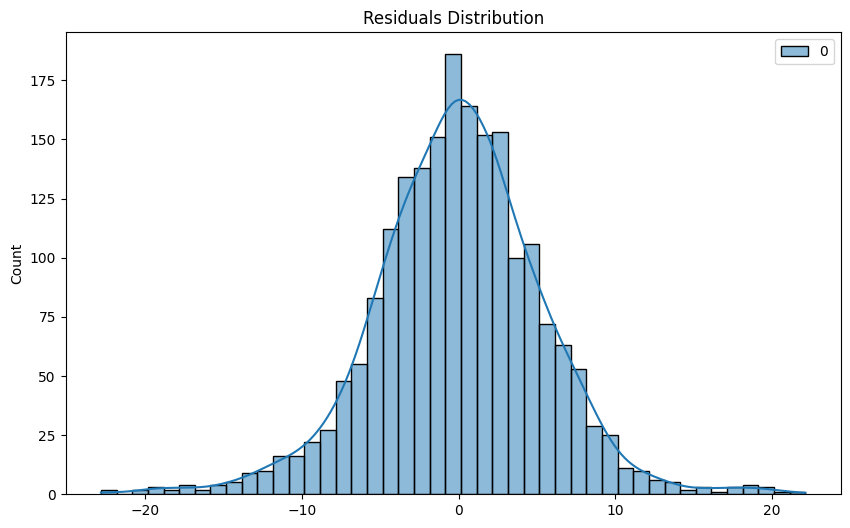

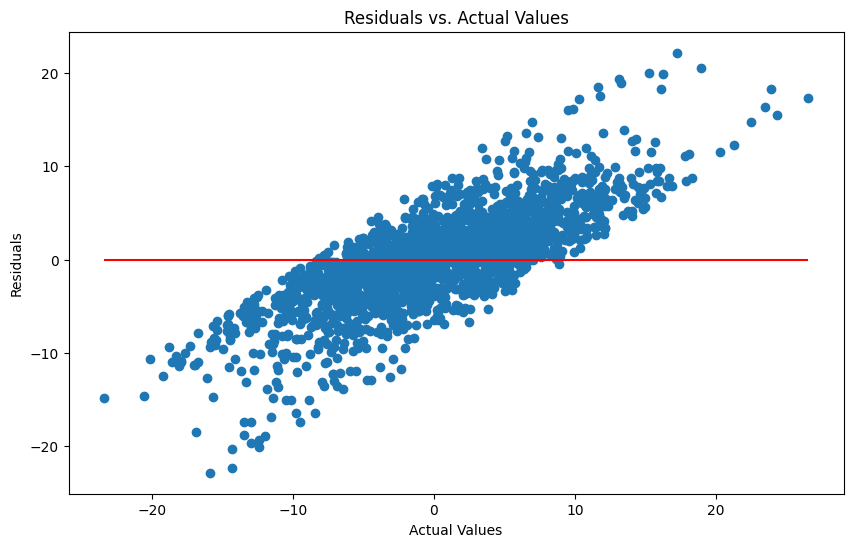

In [19]:
# appears to be a linear relationship between the residuals and the actual values, which is a good sign that the model is systematically off
# polynomial regression 

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
lr = LinearRegression()
lr.fit(X_train_poly, y_train)
y_pred = lr.predict(X_test_poly)
evaluate_model(y_test, y_pred)
# MSE reduction after increasing the degree of the polynomial features, but the residuals are still linearly related to the actual values, lets try feature triming

In [20]:
feature_options = possible_feature_combinations([0,1,2,3])
best_mse = float('inf')
best_features = None

for f in feature_options:
    X_train, X_test, y_train, y_test = train_test_split(X_scaled[:, f], Y_cleaned, test_size=0.2, random_state=42)
    poly = PolynomialFeatures(degree=3)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    lr = LinearRegression()
    lr.fit(X_train_poly, y_train)
    y_pred = lr.predict(X_test_poly)
    print(f'Features: {f}')
    #evaluate_model(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    if mse < best_mse:
        best_mse = mse
        best_features = f
print(f'Best features: {best_features}')
print(f'Best MSE: {best_mse}')

Features: [0]
Features: [1]
Features: [2]
Features: [3]
Features: [0, 1]
Features: [0, 2]
Features: [0, 3]
Features: [1, 2]
Features: [1, 3]
Features: [2, 3]
Features: [0, 1, 2]
Features: [0, 1, 3]
Features: [0, 2, 3]
Features: [1, 2, 3]
Features: [0, 1, 2, 3]
Best features: [0, 1, 2, 3]
Best MSE: 28.678427297058132


### 

/Users/davidhunt/Library/Caches/pypoetry/virtualenvs/learning-4nU40dZu-py3.11/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


MSE with Gradient Boosting: 28.770118799209


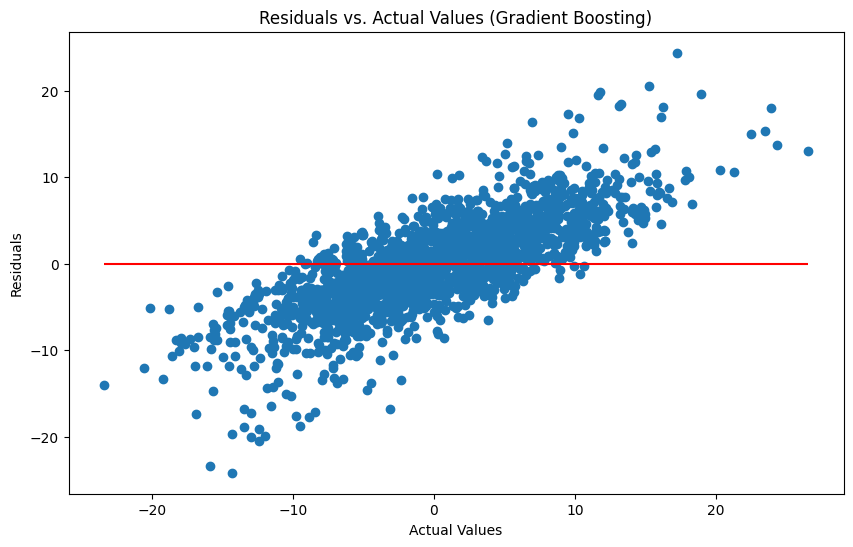

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Train a Gradient Boosting model
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

# Evaluate the model
y_pred = gb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'MSE with Gradient Boosting: {mse}')
# Residual analysis
residuals = y_test[0]-y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='r')
plt.title('Residuals vs. Actual Values (Gradient Boosting)')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()


In [22]:

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(GradientBoostingRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print(f'Best parameters: {grid_search.best_params_}')

# Evaluate the best model
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'MSE with Best Gradient Boosting Model: {mse}')



/Users/davidhunt/Library/Caches/pypoetry/virtualenvs/learning-4nU40dZu-py3.11/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/davidhunt/Library/Caches/pypoetry/virtualenvs/learning-4nU40dZu-py3.11/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/davidhunt/Library/Caches/pypoetry/virtualenvs/learning-4nU40dZu-py3.11/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 300}
MSE with Best Gradient Boosting Model: 28.688720580682848


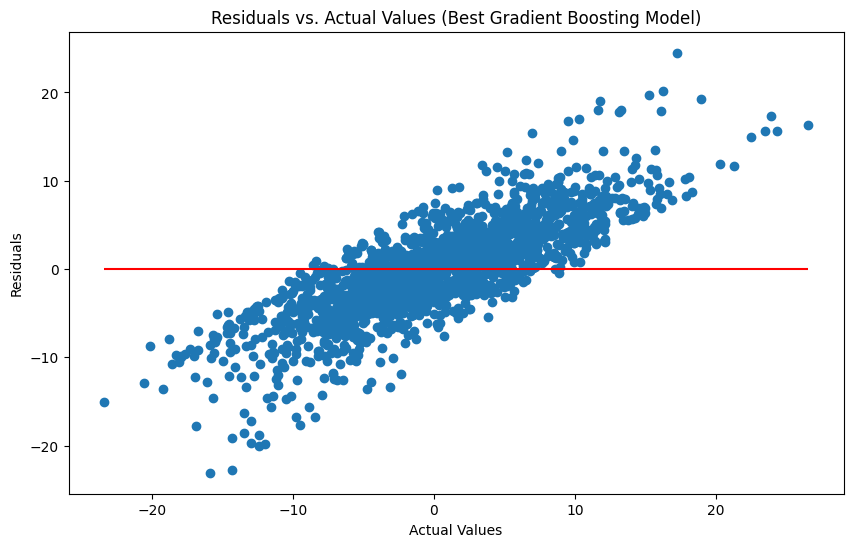

In [23]:
# Residual analysis
residuals = y_test[0] - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='r')
plt.title('Residuals vs. Actual Values (Best Gradient Boosting Model)')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()

MSE of model: 28.678427297058125
RMSE of model: 5.3552242994162365
R² of model: 0.38179114688513405
MAPE of model: 2.000203180134159
Cross-Validated MSE: 29.320174488290025 ± 2.749418470703036


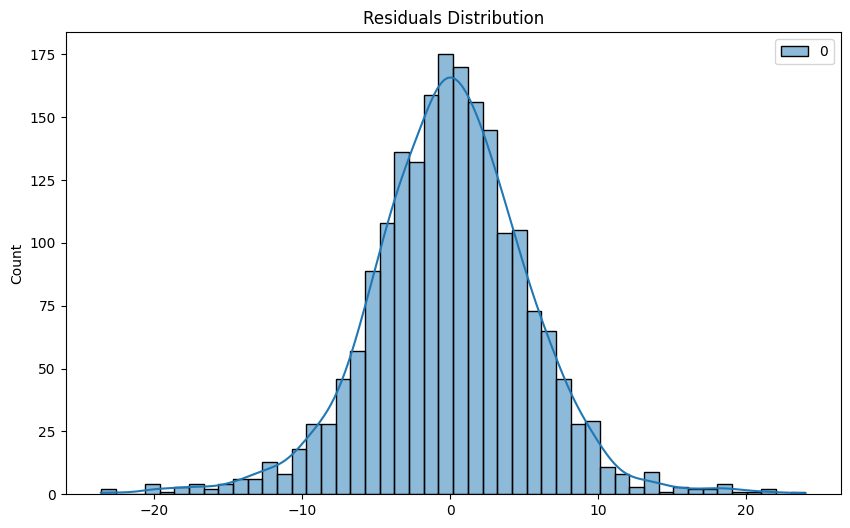

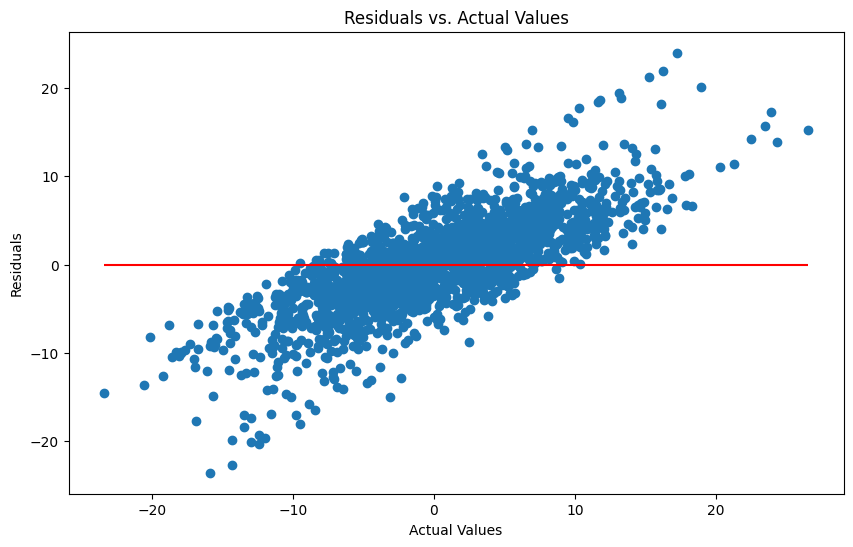

In [24]:
# lets try rescaling 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_cleaned)
# demean the features 
X_scaled = X_scaled - np.mean(X_scaled, axis=0)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y_cleaned, test_size=0.2, random_state=42)
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
lr = LinearRegression()
lr.fit(X_train_poly, y_train)
y_pred = lr.predict(X_test_poly)
evaluate_model(y_test, y_pred)

# Part 3

MSE of model: 20.85809788219635
RMSE of model: 4.567066660581642
R² of model: 0.5503707146718965
MAPE of model: 2.205907945846501
Cross-Validated MSE: 21.837266441302596 ± 0.7355403181137795


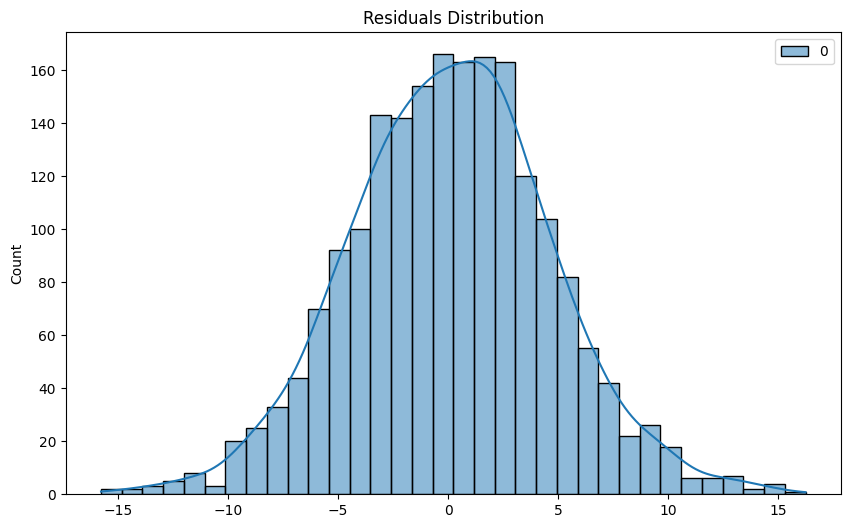

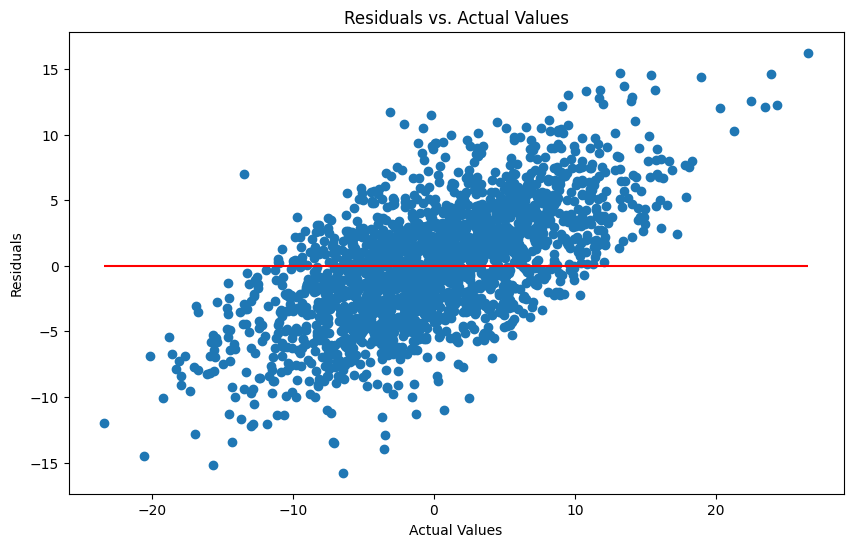

In [25]:
# adding the Z features 
XZ = X_cleaned.join(Z_cleaned.rename(columns={0:4,
                                             1:5,}))
X_scaled = scaler.fit_transform(XZ)
X_scaled = X_scaled - np.mean(X_scaled, axis=0)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y_cleaned, test_size=0.2, random_state=42)
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
lr = LinearRegression()
lr.fit(X_train_poly, y_train)
y_pred = lr.predict(X_test_poly)
evaluate_model(y_test, y_pred)



In [27]:
# try neural network

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [(100,), (100, 100), (100, 100, 100)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

grid_search = GridSearchCV(MLPRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y_cleaned, test_size=0.2, random_state=42)
grid_search.fit(X_train, y_train)


/Users/davidhunt/Library/Caches/pypoetry/virtualenvs/learning-4nU40dZu-py3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davidhunt/Library/Caches/pypoetry/virtualenvs/learning-4nU40dZu-py3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davidhunt/Library/Caches/pypoetry/virtualenvs/learning-4nU40dZu-py3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exa

GridSearchCV(cv=5, estimator=MLPRegressor(), n_jobs=-1,
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(100,), (100, 100),
                                                (100, 100, 100)],
                         'learning_rate': ['constant', 'invscaling',
                                           'adaptive'],
                         'solver': ['adam']},
             scoring='neg_mean_squared_error')

In [28]:
best_model = grid_search.best_estimator_
print(f'Best parameters: {grid_search.best_params_}')


Best parameters: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100,), 'learning_rate': 'invscaling', 'solver': 'adam'}


In [30]:
#evaluate 
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'MSE with Best Neural Network: {mse}')
# Residual analysis
residuals = y_test[0] - y_pred



MSE with Best Neural Network: 20.164003685569487


MSE of model: 20.164003685569487
RMSE of model: 4.490434687819152
R² of model: 0.5653330127367696
MAPE of model: 2.2426995066740743
Cross-Validated MSE: 21.837266441302596 ± 0.7355403181137795


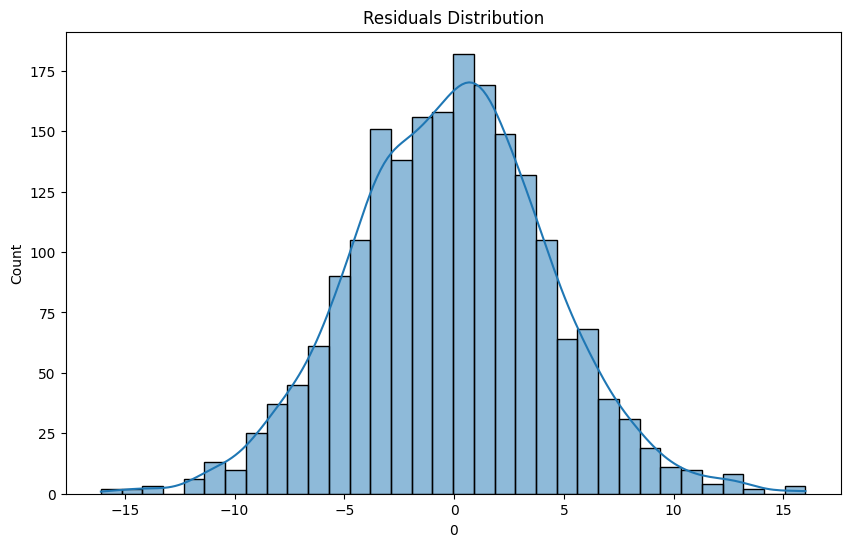

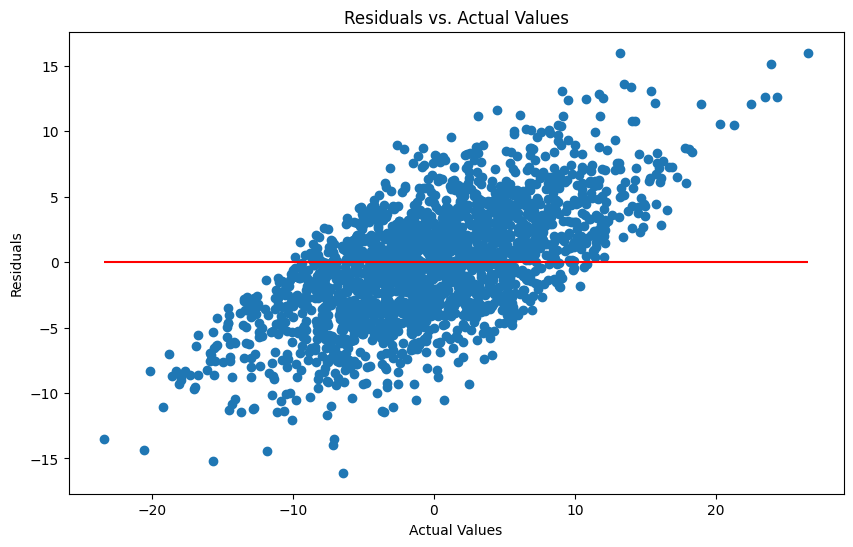

In [34]:
evaluate_model(y_test[0], y_pred)

MSE of model: 20.85809788219635
RMSE of model: 4.567066660581642
R² of model: 0.5503707146718965
MAPE of model: 2.205907945846501
Cross-Validated MSE: 21.837266441302596 ± 0.7355403181137795


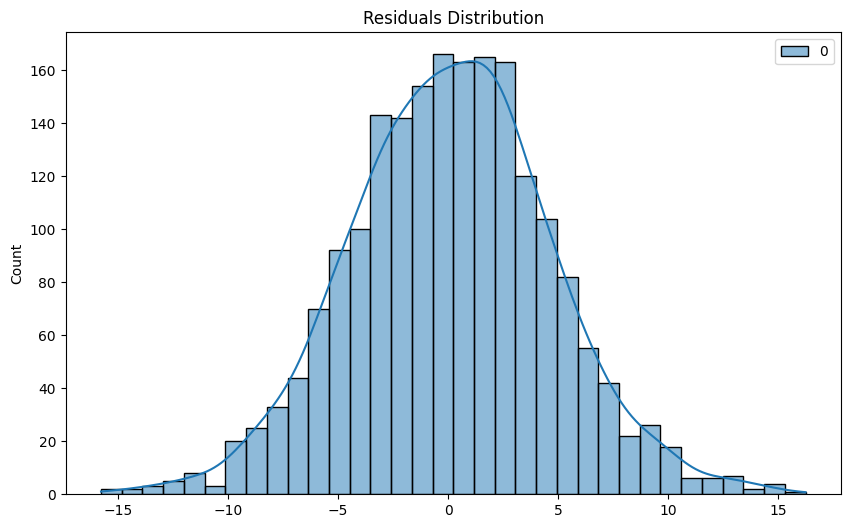

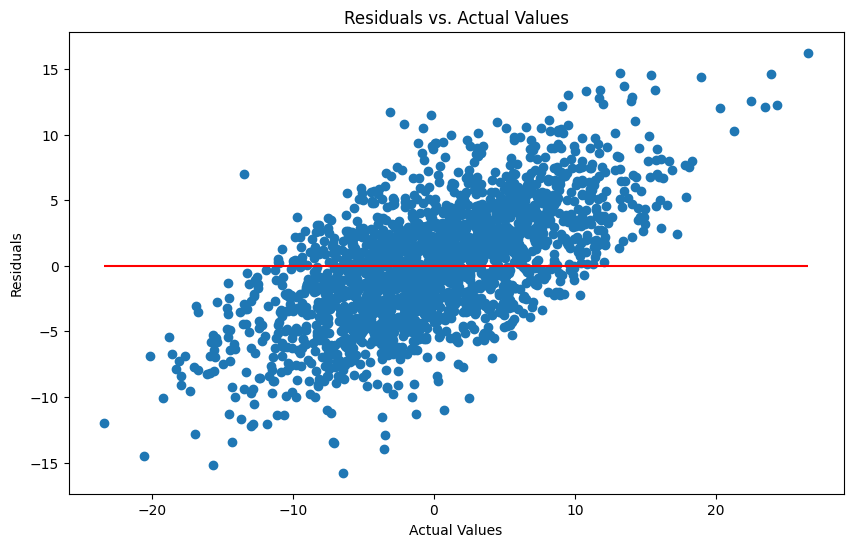

In [41]:
# address the linear bias
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y_cleaned, test_size=0.2, random_state=42)
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
lr = LinearRegression()
lr.fit(X_train_poly, y_train)
y_pred = lr.predict(X_test_poly)
evaluate_model(y_test, y_pred)
